In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
metadata = pd.read_csv('../data/metadata.csv')
sub_format = pd.read_csv('../data/submission_format.csv')
train_labels = pd.read_csv('../data/train_labels.csv')

In [3]:
metadata.head()

,uid,latitude,longitude,date,split
0,aabm,39.080319,-86.430867,2018-05-14,train
1,aabn,36.559700,-121.510000,2016-08-31,test
2,aacd,35.875083,-78.878434,2020-11-19,train
3,aaee,35.487000,-79.062133,2016-08-24,train
4,aaff,38.049471,-99.827001,2019-07-23,train


In [4]:
metadata.shape

(23570, 5)

In [5]:
print(metadata['split'].value_counts(normalize=True))
metadata.split.value_counts()

train    0.723801
test     0.276199
Name: split, dtype: float64


train    17060
test      6510
Name: split, dtype: int64

In [6]:
metadata.uid.nunique() # no duplicates

23570

In [7]:
metadata.date = pd.to_datetime(metadata.date)
metadata.date

0       2018-05-14
1       2016-08-31
2       2020-11-19
3       2016-08-24
4       2019-07-23
           ...    
23565   2014-12-02
23566   2017-06-19
23567   2015-03-24
23568   2016-11-21
23569   2015-08-31
Name: date, Length: 23570, dtype: datetime64[ns]

In [8]:
metadata.date.min()

Timestamp('2013-01-04 00:00:00')

Does train and test data overlap?

In [9]:
date_sorted_metadata = metadata.sort_values(by='date')
date_sorted_metadata

,uid,latitude,longitude,date,split
4387,evep,44.847993,-93.476318,2013-01-04,train
13644,paev,44.822478,-93.367962,2013-01-04,train
5566,gdxr,44.877646,-93.557842,2013-01-04,train
6144,guny,44.878889,-93.490833,2013-01-04,train
5317,fwbt,44.850500,-93.515700,2013-01-04,train
...,...,...,...,...,...
12443,nsoi,36.736800,-121.734000,2021-12-29,test
17559,thki,36.725400,-121.730000,2021-12-29,test
17452,teuu,36.772300,-121.788000,2021-12-29,test
14254,prfi,36.751800,-121.742000,2021-12-29,test


In [10]:
date_sorted_metadata.iloc[:17061].split.value_counts()

train    12628
test      4433
Name: split, dtype: int64

In [11]:
# only traindata
train_metadata = metadata[metadata.split == 'train']
train_metadata.sort_values(by='date')

,uid,latitude,longitude,date,split
5317,fwbt,44.850500,-93.515700,2013-01-04,train
6144,guny,44.878889,-93.490833,2013-01-04,train
5566,gdxr,44.877646,-93.557842,2013-01-04,train
13644,paev,44.822478,-93.367962,2013-01-04,train
4387,evep,44.847993,-93.476318,2013-01-04,train
...,...,...,...,...,...
17778,tobi,36.030000,-78.705932,2021-12-14,train
11041,mdcu,35.980000,-78.843884,2021-12-14,train
6718,hkvs,36.030000,-78.706429,2021-12-14,train
18793,uscb,35.980000,-78.843636,2021-12-14,train


In [12]:
test_metadata = metadata[metadata.split == 'test']
test_metadata.sort_values(by='date')

,uid,latitude,longitude,date,split
6865,howw,37.0062,-120.600,2013-01-08,test
3661,eamn,36.9818,-120.221,2013-01-08,test
7668,imsv,36.9836,-120.500,2013-01-08,test
20182,wgxq,33.8011,-117.205,2013-01-25,test
16095,rsos,33.8892,-117.562,2013-01-25,test
...,...,...,...,...,...
12443,nsoi,36.7368,-121.734,2021-12-29,test
14254,prfi,36.7518,-121.742,2021-12-29,test
6864,howu,36.7085,-121.749,2021-12-29,test
6540,hfvr,36.7962,-121.782,2021-12-29,test


In [13]:
metadata[['latitude','longitude']].duplicated().sum()
# some locations might have been sampled more frequently

10889

In [14]:
metadata[['latitude','longitude']].nunique()

latitude      8583
longitude    11167
dtype: int64

In [15]:
sub_format

,uid,region,severity
0,aabn,west,1
1,aair,west,1
2,aajw,northeast,1
3,aalr,midwest,1
4,aalw,west,1
...,...,...,...
6505,zzpn,northeast,1
6506,zzrv,west,1
6507,zzsx,south,1
6508,zzvv,west,1


In [16]:
train_labels

,uid,region,severity,density
0,aabm,midwest,1,585.0
1,aacd,south,1,290.0
2,aaee,south,1,1614.0
3,aaff,midwest,3,111825.0
4,aafl,midwest,4,2017313.0
...,...,...,...,...
17055,zzsv,south,3,113125.0
17056,zzuq,south,3,175726.0
17057,zzwo,midwest,2,48510.0
17058,zzwq,south,1,1271.0


In [17]:
train_labels.uid.nunique()

17060

In [18]:
train_labels.region.value_counts()
# south region relatively sampled a lot.

south        9948
west         3769
midwest      2200
northeast    1143
Name: region, dtype: int64

<AxesSubplot:>

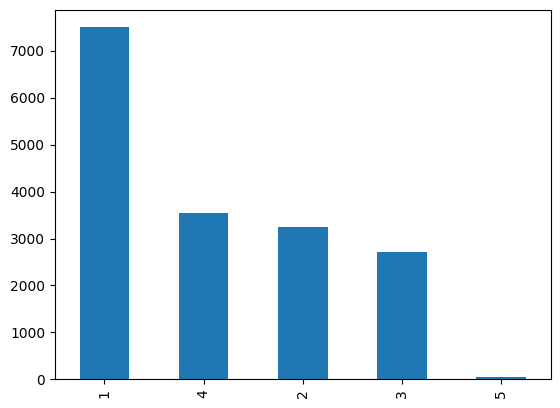

In [19]:
train_labels.severity.value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

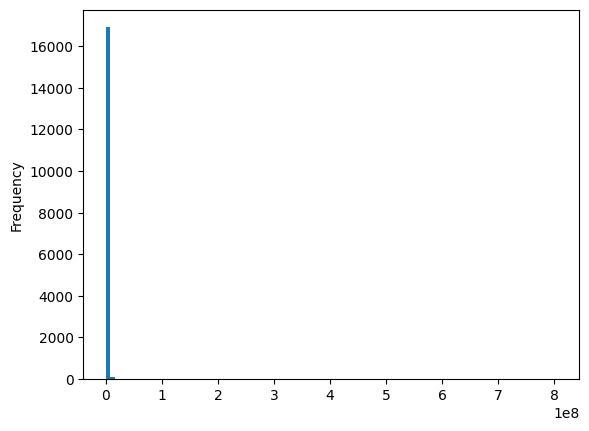

In [20]:
train_labels.density.plot.hist(bins=100)

<AxesSubplot:xlabel='density', ylabel='Density'>

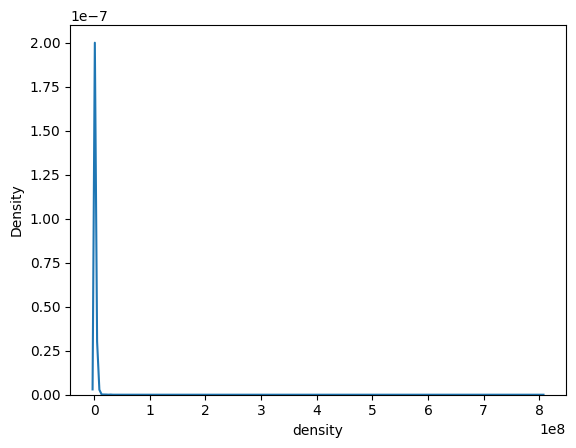

In [21]:
import seaborn as sns
sns.kdeplot(train_labels.density)

In [22]:
train_labels.max()

uid                zzyb
region             west
severity              5
density     804667500.0
dtype: object

In [23]:
train_labels.min()

uid            aabm
region      midwest
severity          1
density         0.0
dtype: object

In [24]:
# algal bloom density based on region
train_labels.groupby('region').density.agg(['mean', 'count']).sort_values(by='mean')

,mean,count
region,,
south,9.067514e+04,9948
northeast,3.637635e+05,1143
midwest,1.085957e+06,2200
west,3.880252e+06,3769


In [25]:
train_labels.groupby('region').severity.agg(['mean', 'count']).sort_values(by='mean')

,mean,count
region,,
south,1.567652,9948
northeast,1.805774,1143
midwest,2.194091,2200
west,3.747413,3769


In [26]:
train_labels

,uid,region,severity,density
0,aabm,midwest,1,585.0
1,aacd,south,1,290.0
2,aaee,south,1,1614.0
3,aaff,midwest,3,111825.0
4,aafl,midwest,4,2017313.0
...,...,...,...,...
17055,zzsv,south,3,113125.0
17056,zzuq,south,3,175726.0
17057,zzwo,midwest,2,48510.0
17058,zzwq,south,1,1271.0


# Baseline analysis

In [27]:
# what will be the score with if all preds are dumb averages
from sklearn.metrics import mean_squared_error as mse


In [28]:
# avg of severity over all areas
avg_severity = [train_labels.severity.mean()]*len(train_labels)

mse(train_labels.severity, avg_severity, squared=False)   # really why heck is the given lgbm baseline 1.56? does that mean test and train set differs?

1.1999064765759453

In [29]:
# avg of severity grouped by regions

avg_severity_by_region = train_labels.groupby('region').severity.mean().reset_index()

avg_severity_by_region

,region,severity
0,midwest,2.194091
1,northeast,1.805774
2,south,1.567652
3,west,3.747413


In [30]:
avg_severity_by_region_map = {
                                "midwest" : 2,
                                "northeast" : 2,
                                "south" : 2,
                                "west" : 4
                            }
train_labels['avg_severity_by_region'] = train_labels['region'].map(avg_severity_by_region_map)
train_labels

,uid,region,severity,density,avg_severity_by_region
0,aabm,midwest,1,585.0,2
1,aacd,south,1,290.0,2
2,aaee,south,1,1614.0,2
3,aaff,midwest,3,111825.0,2
4,aafl,midwest,4,2017313.0,2
...,...,...,...,...,...
17055,zzsv,south,3,113125.0,2
17056,zzuq,south,3,175726.0,2
17057,zzwo,midwest,2,48510.0,2
17058,zzwq,south,1,1271.0,2


In [31]:
mse(train_labels.severity, train_labels.avg_severity_by_region, squared=False)
# twice better than given lgbm baseline

0.894754808017972

In [31]:
# avg_severity_by_region_map = {
#                                 "midwest" : 2,
#                                 "northeast" : 2,
#                                 "south" : 1,
#                                 "west" : 4
#                             }
# train_labels['avg_severity_by_region'] = train_labels['region'].map(avg_severity_by_region_map)
# mse(train_labels.severity, train_labels.avg_severity_by_region, squared=False)

0.9378081752177657

In [32]:
sub_format['severity'] = sub_format.region.map(avg_severity_by_region_map)
sub_format

,uid,region,severity
0,aabn,west,4
1,aair,west,4
2,aajw,northeast,2
3,aalr,midwest,2
4,aalw,west,4
...,...,...,...
6505,zzpn,northeast,2
6506,zzrv,west,4
6507,zzsx,south,2
6508,zzvv,west,4


In [33]:
# first prediction avg severity by region
sub_format.to_csv('../submissions/avg_severity_by_region.csv', index=False)
# i'm wondering if this is right to do...

<AxesSubplot:>

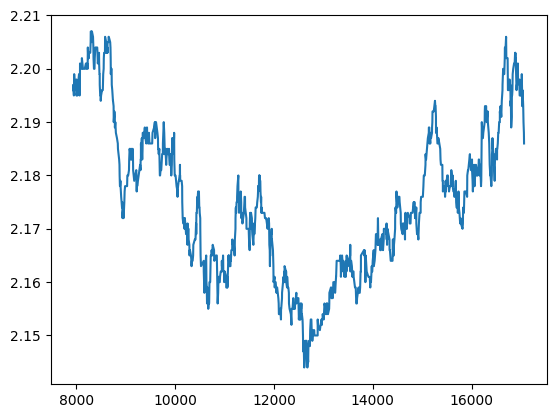

In [34]:
# Better modelling than avg severity by region --> using date time.

train_labels[train_labels['region'] == 'midwest'].severity.rolling(1000).mean().plot()

Text(0.5, 1.0, 'west')

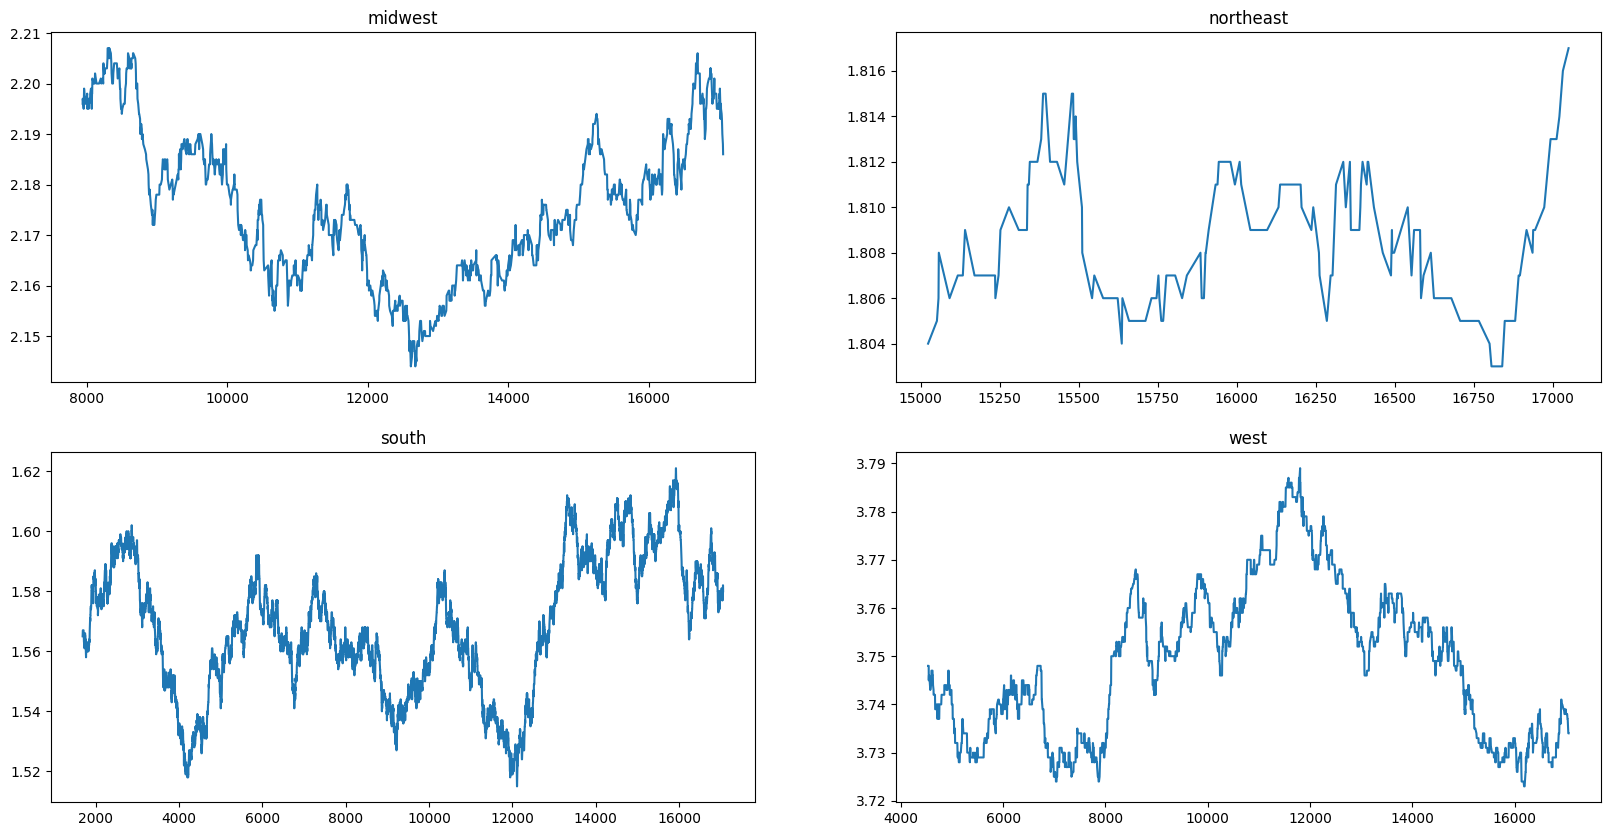

In [35]:
# plot rolling average of severity by region

fig, ax = plt.subplots(2,2, figsize=(20,10))
ax[0,0].plot(train_labels[train_labels['region'] == 'midwest'].severity.rolling(1000).mean())
ax[0,0].set_title('midwest')
ax[0,1].plot(train_labels[train_labels['region'] == 'northeast'].severity.rolling(1000).mean())
ax[0,1].set_title('northeast')
ax[1,0].plot(train_labels[train_labels['region'] == 'south'].severity.rolling(1000).mean())
ax[1,0].set_title('south')
ax[1,1].plot(train_labels[train_labels['region'] == 'west'].severity.rolling(1000).mean())
ax[1,1].set_title('west')



In [36]:
metadata.date.dt.month.value_counts()

8     4330
7     3392
6     3091
9     2593
5     2288
4     1632
10    1333
3     1125
12    1055
1      987
2      912
11     832
Name: date, dtype: int64

In [37]:
data = pd.merge(train_labels, metadata, on='uid')
data

,uid,region,severity,density,avg_severity_by_region,latitude,longitude,date,split
0,aabm,midwest,1,585.0,2,39.080319,-86.430867,2018-05-14,train
1,aacd,south,1,290.0,2,35.875083,-78.878434,2020-11-19,train
2,aaee,south,1,1614.0,2,35.487000,-79.062133,2016-08-24,train
3,aaff,midwest,3,111825.0,2,38.049471,-99.827001,2019-07-23,train
4,aafl,midwest,4,2017313.0,2,39.474744,-86.898353,2021-08-23,train
...,...,...,...,...,...,...,...,...,...
17055,zzsv,south,3,113125.0,2,38.707825,-75.080867,2018-06-27,train
17056,zzuq,south,3,175726.0,2,35.794000,-79.015368,2015-08-06,train
17057,zzwo,midwest,2,48510.0,2,39.792190,-99.971050,2017-06-19,train
17058,zzwq,south,1,1271.0,2,35.794000,-79.012551,2015-03-24,train


In [38]:
data['month'] = data.date.dt.month
data['year'] = data.date.dt.year
data

,uid,region,severity,density,avg_severity_by_region,latitude,longitude,date,split,month,year
0,aabm,midwest,1,585.0,2,39.080319,-86.430867,2018-05-14,train,5,2018
1,aacd,south,1,290.0,2,35.875083,-78.878434,2020-11-19,train,11,2020
2,aaee,south,1,1614.0,2,35.487000,-79.062133,2016-08-24,train,8,2016
3,aaff,midwest,3,111825.0,2,38.049471,-99.827001,2019-07-23,train,7,2019
4,aafl,midwest,4,2017313.0,2,39.474744,-86.898353,2021-08-23,train,8,2021
...,...,...,...,...,...,...,...,...,...,...,...
17055,zzsv,south,3,113125.0,2,38.707825,-75.080867,2018-06-27,train,6,2018
17056,zzuq,south,3,175726.0,2,35.794000,-79.015368,2015-08-06,train,8,2015
17057,zzwo,midwest,2,48510.0,2,39.792190,-99.971050,2017-06-19,train,6,2017
17058,zzwq,south,1,1271.0,2,35.794000,-79.012551,2015-03-24,train,3,2015


In [39]:
avg_by_region_and_month = data.groupby(['region', 'month']).severity.mean().unstack().apply(np.round).fillna(1.0)
avg_by_region_and_month

month,1,2,3,4,5,6,7,8,9,10,11,12
region,,,,,,,,,,,,
midwest,1.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0
northeast,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0
south,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
west,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0


In [40]:
train_labels['avg_by_region_and_month'] = data[['region', 'month']].apply(lambda x: avg_by_region_and_month[x[1]][x[0]], axis=1)

In [41]:
len(train_labels) - (train_labels['avg_by_region_and_month'] == train_labels.avg_severity_by_region).sum()

4930

In [42]:
mse(train_labels.severity, train_labels.avg_by_region_and_month, squared=False)

0.8579672806294627

In [43]:
avg_by_region_and_year = data.groupby(['region', 'year']).severity.mean().unstack().apply(np.round).fillna(1.0)
train_labels['avg_by_region_and_year'] = data[['region', 'year']].apply(lambda x: avg_by_region_and_year[x[1]][x[0]], axis=1)
mse(train_labels.severity, train_labels.avg_by_region_and_year, squared=False)
# months capture more variance than years

0.8838793316505986

In [44]:
seasons = {
    1: 1,
    2: 1,
    3: 2,
    4: 2,
    5: 2,
    6: 3,
    7: 3,
    8: 3,
    9: 4,
    10: 4,
    11: 4,
    12: 1
}

data['season'] = data.month.map(seasons)

In [45]:
avg_by_region_and_season = data.groupby(['region', 'season']).severity.mean().unstack().apply(np.round).fillna(1.0)
train_labels['avg_by_region_and_season'] = data[['region', 'season']].apply(lambda x: avg_by_region_and_season[x[1]][x[0]], axis=1)
mse(train_labels.severity, train_labels.avg_by_region_and_season, squared=False)

0.8620907544645036

In [46]:
data['week'] = data.date.dt.isocalendar().week
avg_by_region_and_week = data.groupby(['region', 'week']).severity.mean().unstack().apply(np.round).fillna(1.0)
train_labels['avg_by_region_and_week'] = data[['region', 'week']].apply(lambda x: avg_by_region_and_week[x[1]][x[0]], axis=1)
mse(train_labels.severity, train_labels.avg_by_region_and_week, squared=False)

0.8358890080406541

In [47]:
# Use only the data that was available at time of collection

# simple avg 
simple_rolling_avg = data.sort_values(by='date').severity.expanding(1).mean()
simple_rolling_avg = simple_rolling_avg.map(np.round)
simple_rolling_avg

3850     1.0
4456     1.0
4034     1.0
9894     1.0
3177     1.0
        ... 
12864    2.0
8013     2.0
4876     2.0
13595    2.0
16772    2.0
Name: severity, Length: 17060, dtype: float64

In [71]:
(data.sort_values(by='date').severity == simple_rolling_avg).sum()

3243

In [49]:
mse(data.sort_values(by='date').severity, simple_rolling_avg, squared=False)

1.2085810811762927

In [50]:
grp_by_region = data.sort_values(by='date').groupby('region').severity.expanding(1).mean()
grp_by_region = grp_by_region.map(np.round)
grp_by_region

region        
midwest  3850     1.0
         4456     1.0
         4034     1.0
         9894     1.0
         3177     1.0
                 ... 
west     1264     4.0
         6920     4.0
         14230    4.0
         15072    4.0
         4211     4.0
Name: severity, Length: 17060, dtype: float64

In [70]:
mse(train_labels.severity, grp_by_region.droplevel(0).sort_index().values, squared=False)

0.8940994539360385